# Data Analysis and Visualisations

__Project Goal__

Compare recipes from two popular recipe websites, Spoonacular and Food.com, and identify "healthy" recipes using two market-implemented measures: Nutri-Scores and Weight Watchers (WW) Smart Points. The project will investigate recipe popularity, meal types, and cuisines.

__Scope__
* Nutritional values of interest: `calories`, `saturated fat`, `sugar`, and `protein`.
* Meal types: `breakfast`, `lunch`, and `dinner`.
* Cuisines

__Research Questions__
1. Are more popular / higher-rated recipes healthier? What is the health rating of the highest-rated recipes?
2. What meal type (i.e., breakfast, lunch, or dinner) have the healthiest / unhealthiest (percentage) recipes? What is the most popular ingredient for each meal?
3. Which cuisine has the healthiest recipes?

# Setup
This section contains the library imports and functions used throughout the project.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import hvplot.pandas

# Import functions notebook
%run functions.ipynb

In [2]:
# Import cleaned data
clean_recipes = pd.read_csv('Output/clean_recipes.csv')
clean_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
0,munch without guilt tomatoes,30300,10,6164,2002-06-04,"['15-minutes-or-less', 'time-to-make', 'course...","[3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3,['put a slice of tomato on each biscuit / crac...,anytime munchies...another sweat free preparat...,...,0.0,0.0,0.0,0.00,0.5,0.000,0.0,0.0,0.0,1
1,now and later vegetarian empanadas,38276,90,37640,2002-08-26,"['weeknight', 'time-to-make', 'course', 'main-...","[477.1, 36.0, 24.0, 21.0, 26.0, 61.0, 18.0]",41,"['in a pot , cover carrots with water to cover...",this is from,...,26.0,61.0,18.0,23.40,12.0,0.504,13.0,12.2,54.0,20
2,pour over anything mushroom gravy,35595,20,6164,2002-07-29,"['30-minutes-or-less', 'time-to-make', 'course...","[33.1, 0.0, 11.0, 0.0, 2.0, 0.0, 2.0]",6,"['in a small saucepan , saut onion and mushroo...",the name says it all...absolute must for all t...,...,2.0,0.0,2.0,0.00,5.5,0.000,1.0,0.0,6.0,7
3,tide me over indian chaat simple veggie salad,63793,2,12657,2003-06-05,"['15-minutes-or-less', 'time-to-make', 'course...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"['toss everything well in a serving bowl', 'gr...",this version of the famous indian chaat (prono...,...,5.0,3.0,4.0,0.65,7.5,0.000,2.5,0.6,12.0,9
4,denauseating with ginger tea,30473,10,6164,2002-06-05,"['15-minutes-or-less', 'time-to-make', 'course...","[13.7, 0.0, 11.0, 0.0, 0.0, 0.0, 1.0]",5,['bring water to boil with crushed ginger in i...,actually an excellent drink to de-stress and f...,...,0.0,0.0,1.0,0.00,5.5,0.000,0.0,0.0,3.0,7


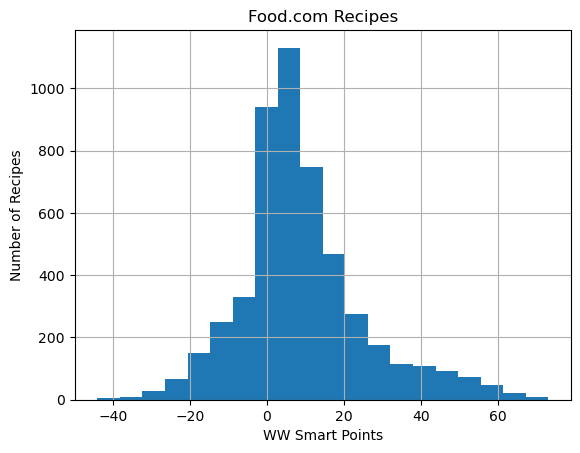

In [3]:
# Create a histogram of the points to understand distribution
clean_recipes['wws_points'].hist(bins=20)
plt.title("Food.com Recipes")
plt.xlabel("WW Smart Points")
plt.ylabel("Number of Recipes")
plt.show()

ShapiroResult(statistic=0.9358086585998535, pvalue=7.591684578070815e-14)

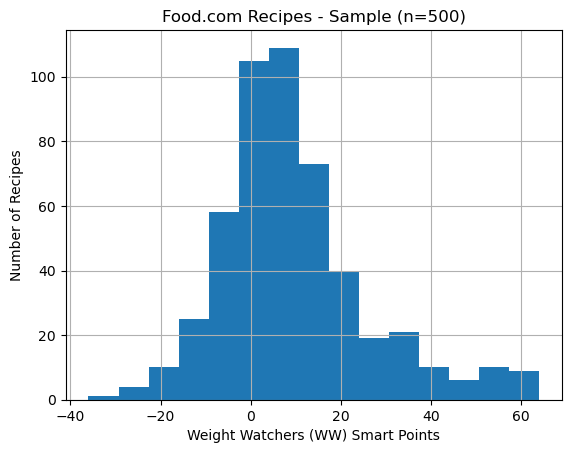

In [4]:
# Check for Gaussian distribution - using Shapiro-Wilk test
# Note: Shapiro-Wilk is sensitive to sample size
sample_size = 500
sample_set = clean_recipes['wws_points'].sample(n=sample_size)
sample_set.hist(bins=15)
plt.title(f"Food.com Recipes - Sample (n={sample_size})")
plt.xlabel("Weight Watchers (WW) Smart Points")
plt.ylabel("Number of Recipes")

stats.shapiro(sample_set)
# A very high W-statistic suggests a good fit to a normal distribution.
# A near-zero p-value, for a Shapiro-Wilk test, rejects the null hypothesis, meaning NOT a normal distribution.

# Meal Types

In [5]:
# Isolate 'breakfast, lunch, dinner' from clean_recipes
meal_df = clean_recipes.groupby(['meal_type']).median(numeric_only=True)
meal_df = meal_df.drop(columns=['id', 'contributor_id'])
meal_df

,minutes,n_steps,n_ingredients,rating,Calories,Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
meal_type,,,,,,,,,,,,,,,,,,
breakfast,26.0,10.0,8.0,5.000000,287.5,24.0,13.0,15.0,24.0,27.0,7.0,15.6,6.5,0.360,12.0,5.4,21.0,5.0
dinner,35.0,9.0,10.0,4.875000,268.8,20.0,15.0,12.0,18.0,18.0,5.0,13.0,7.5,0.288,9.0,3.6,15.0,7.0
lunch,30.0,9.0,9.0,4.833333,297.0,20.0,13.0,19.0,26.0,18.0,8.0,13.0,6.5,0.456,13.0,3.6,24.0,5.0


In [6]:
updated_types = clean_recipes['meal_type'].unique()
updated_types = ['breakfast', 'lunch', 'dinner']

# Breakfast
breakfast = clean_recipes.loc[clean_recipes['meal_type'] == "breakfast"].copy()
print(f'breakfast: {breakfast.shape}')

# Lunch
lunch = clean_recipes.loc[clean_recipes['meal_type'] == "lunch"].copy()
print(f'lunch: {lunch.shape}')

# Dinner
dinner = clean_recipes.loc[clean_recipes['meal_type'] == "dinner"].copy()
print(f'dinner: {dinner.shape}')

breakfast: (519, 29)
lunch: (1403, 29)
dinner: (3124, 29)


breakfast R-value: 0.097
lunch R-value: 0.386
dinner R-value: 0.234


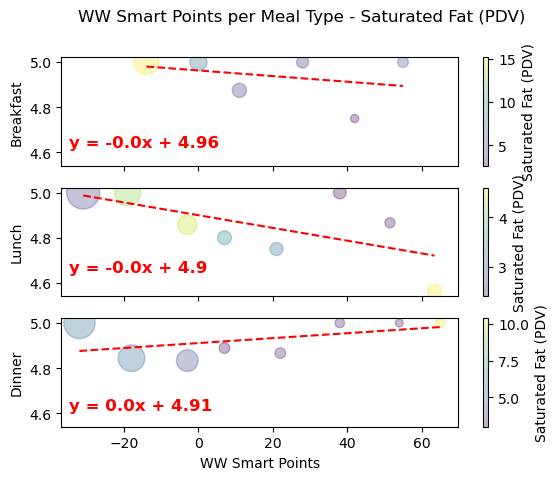

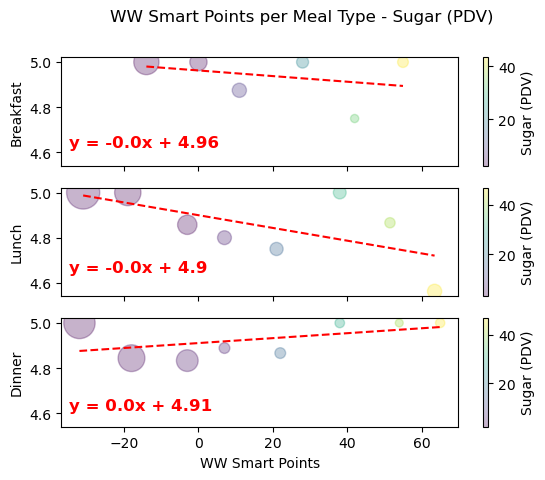

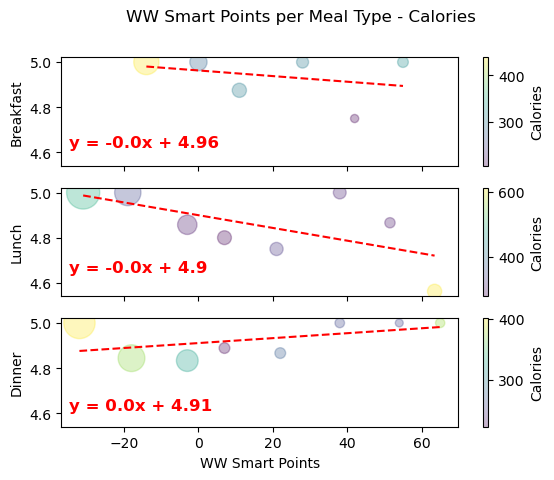

In [27]:
# Create list of nutritional values to create a plot for
nutrition_list = ['Calories', 'Saturated Fat (PDV)', 'Sugar (PDV)']

def meal_plots(target_nutrition):
    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    x_col = 'wws_points'
    y_col = 'rating'
    size_col = 'protein_g'
    df_list = [breakfast, lunch, dinner]

    rsquared_list = []
    for idx, val in enumerate(df_list):        
        colour_col = target_nutrition
        # Bin by `wws_points`
        min_points = df_list[idx]['wws_points'].describe().min()
        max_points = df_list[idx]['wws_points'].describe().max()
        
        # Create bins
        points_bins = np.arange(min_points, max_points, 15) # 5 was good with less granular cuisines
        points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
        bins_df = pd.cut(df_list[idx]['wws_points'], bins=points_bins, labels=points_labels)
        
        # Set the index and its name
        points_df = df_list[idx].set_index(bins_df)
        points_df.index.name = "WWS Point Ranges"
        
        # Create grouped DataFrame by numeric means
        binned_df = points_df.groupby(['WWS Point Ranges']).median(numeric_only=True) # originally mean
        binned_df
    
        # Extract x- and y-values
        x = binned_df[x_col]
        y = binned_df[y_col]
        size = binned_df[size_col]
        colour = binned_df[colour_col]
    
        scatter_plot = axs[idx].scatter(x, y, s=size*10, alpha=0.3, c=colour)
        axs[2].set_xlabel('WW Smart Points')
        axs[idx].set_ylabel(updated_types[idx].title())
        cbar = plt.colorbar(scatter_plot)

        if (target_nutrition == "sat_fat_g"):
            bar_label = nutrition_list[1]
        elif (target_nutrition == "sugar_g"):
            bar_label = nutrition_list[2]
        else:        
            bar_label = target_nutrition
        cbar.set_label(bar_label)
        fig.suptitle(f"WW Smart Points per Meal Type - {bar_label}")
    
        (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
        line_equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
        regression_values = slope * x + intercept
        axs[idx].plot(x, regression_values, linestyle='--', c='red')
        if idx == 0:
            x_coord, y_coord = 50, 240
        elif idx == 1:
            x_coord, y_coord = 50, 150
        elif idx == 2:
            x_coord, y_coord = 50, 50
        axs[idx].annotate(line_equation, xy=(x_coord, y_coord), xycoords='figure points',
            fontsize = 12, color='red', weight='bold')

        rsquared = round(rvalue**2, 3)
        rsquared_list.append(rsquared)
        # print(f'{updated_types[idx]} R-value: {rsquared}')
    
    fig.savefig(f'Meal types and WW Smart Points - {colour_col}.png')
    return(rsquared_list)

rvals = meal_plots('sat_fat_g')
for index in range(len(rvals)):
    print(f'{updated_types[index]} R-value: {rvals[index]}')
meal_plots('sugar_g')
meal_plots('Calories')
plt.show()

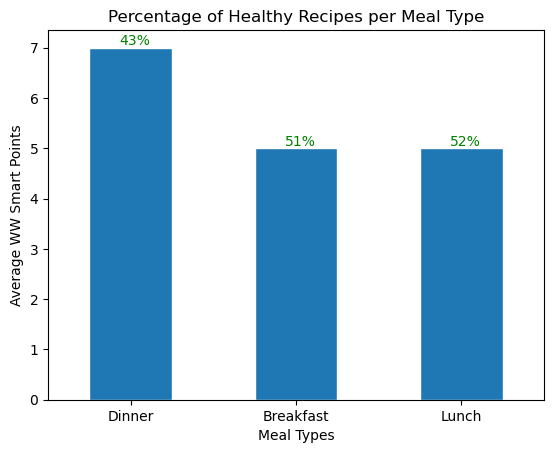

In [8]:
# Create a DataFrame grouped by the means of each cuisine
meal_df = clean_recipes.groupby(['meal_type']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
meal_count = clean_recipes.groupby(['meal_type'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['meal_type'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(meal_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / meal_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = meal_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = percent_df['ave_wws_points'].plot(
    kind = "bar",
    title = "Percentage of Healthy Recipes per Meal Type",
    edgecolor = "white")

# Set the labels
bar_chart.set_xlabel("Meal Types")
bar_chart.set_ylabel("Average WW Smart Points")
cuisine_titles = [word.title() for word in percent_df['meal_type']]
bar_chart.set_xticklabels(
    cuisine_titles,
    rotation_mode='default',
    rotation=0)

# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%",
        color = "green",
        xy = (row.name, meal_df[meal_df.index == row['meal_type']]['wws_points']),
        xytext = (-8, 2),
        textcoords='offset points')

# Cuisines

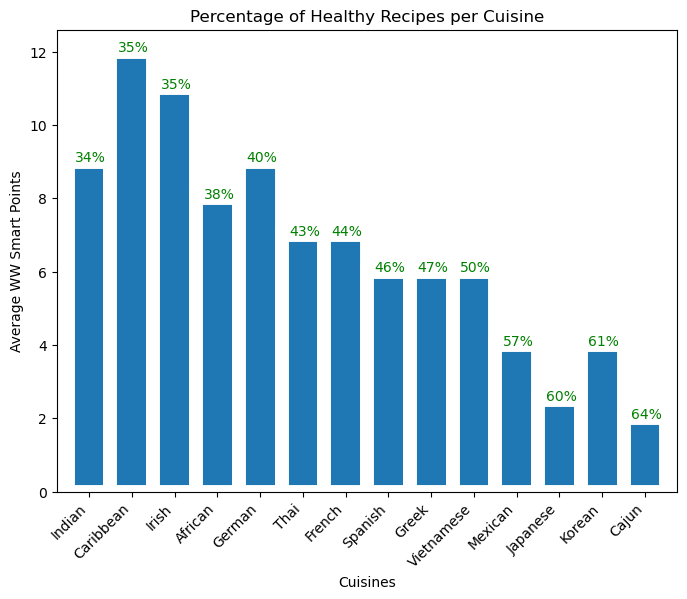

In [9]:
# Create a DataFrame grouped by the means of each cuisine
cuisine_df = clean_recipes.groupby(['cuisine']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
cuisine_count = clean_recipes.groupby(['cuisine'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['cuisine'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(cuisine_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / cuisine_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = cuisine_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = percent_df['ave_wws_points'].plot(
    kind = "bar",
    title = "Percentage of Healthy Recipes per Cuisine",
    figsize = (8,6),
    width = 1,
    linewidth = 10,
    edgecolor = "white")

# Set the labels
bar_chart.set_xlabel("Cuisines")
bar_chart.set_ylabel("Average WW Smart Points")
cuisine_titles = [word.title() for word in percent_df['cuisine']]
bar_chart.set_xticklabels(
    cuisine_titles,
    rotation_mode='default',
    rotation=45,
    ha='right')

# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%", color="green",
        xy=(row.name, cuisine_df[cuisine_df.index == row['cuisine']]['wws_points']),
        xytext=(-10,0), textcoords='offset points')

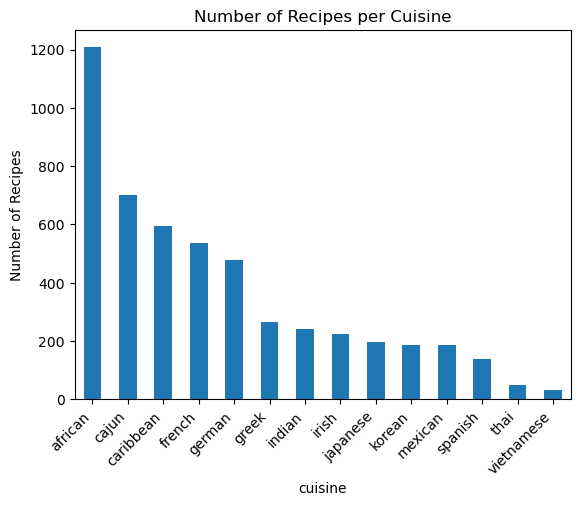

In [10]:
# Create a DataFrame grouped by the means of each cuisine
cuisine_count = clean_recipes.groupby(['cuisine'])['id'].count()
count_chart = cuisine_count.sort_values(ascending=False).plot(
    kind = "bar",
    title = "Number of Recipes per Cuisine")
count_chart.set_ylabel("Number of Recipes")
count_chart.set_xticklabels(
    cuisine_count.index,
    rotation_mode='default',
    rotation=45,
    ha='right')
plt.show()

In [11]:
# Import cuisine_dataframe.csv, which contains geographic information
cuisine_data = pd.read_csv('Output/cuisine_dataframe.csv')

# Plot each region with the rating as the colour and WW Smart points as the size
cuisine_map = cuisine_data.hvplot.points(
    'longitude',
    'latitude',
    color = 'rating',
    # cmap = ['purple', 'red'],
    size = 'wws_points',
    scale = 30,
    alpha = 0.3,
    geo = True,
    tiles = "CartoLight",
    frame_width = 1000,
    frame_height = 800)
cuisine_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (rating,wws_points)

# Popularity

In [12]:
# Identify high protien recipe
highest_rated = clean_recipes.loc[clean_recipes['rating'] >= 5]

wws_point_for_food = highest_rated[['name', 'wws_points', 'cuisine', 'protein_g', 'meal_type']]
wws_point_for_food = wws_point_for_food.sort_values('wws_points')
wws_point_for_food.reset_index(drop=True).head(10)

,name,wws_points,cuisine,protein_g,meal_type
0,garlic chicken kabobs on rosemary skewers,-44,greek,54.0,lunch
1,cajun style grilled swordfish,-39,cajun,56.0,dinner
2,venison gyros,-36,greek,57.5,lunch
3,delicious mexi baked fish fillets,-36,mexican,59.0,dinner
4,lime chicken taco s,-35,mexican,48.5,lunch
5,golden grouper,-35,caribbean,50.5,dinner
6,haddock in mustard sauce,-32,german,48.5,dinner
7,puck s packet o fish,-32,french,43.5,dinner
8,charred prawns shrimp with capsicum mayonnaise,-32,mexican,51.5,dinner
9,moroccan marinade for grilling chicken,-31,african,50.0,dinner


In [13]:
best_recipe = clean_recipes.loc[clean_recipes['id'] == 175916]
best_recipe

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
1751,garlic chicken kabobs on rosemary skewers,175916,40,274719,2006-07-03,"['lactose', '60-minutes-or-less', 'time-to-mak...","[283.5, 4.0, 0.0, 6.0, 108.0, 3.0, 3.0]",11,['to roast garlic: fill an oven-safe dish half...,garlic chicken kabobs on rosemary skewers from...,...,108.0,3.0,3.0,2.6,0.0,0.144,54.0,0.6,9.0,-44


In [14]:
# What is the health rating of the highest-rated recipes?
by_rating = highest_rated.groupby(['wws_points']).mean(numeric_only=True)
by_rating

,id,minutes,contributor_id,n_steps,n_ingredients,rating,Calories,Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g
wws_points,,,,,,,,,,,,,,,,,,,
-44,175916.000000,40.000000,274719.0,11.000000,6.000000,5.0,283.500000,4.000000,0.000000,6.000000,108.000000,3.000000,3.0,2.600000,0.000000,0.144,54.000000,0.600000,9.0
-39,55750.000000,20.000000,57505.0,5.000000,8.000000,5.0,477.100000,39.000000,0.000000,9.000000,112.000000,28.000000,0.0,25.350000,0.000000,0.216,56.000000,5.600000,0.0
-36,400050.500000,80.000000,805276.0,9.000000,10.500000,5.0,432.400000,17.500000,11.000000,27.500000,116.500000,23.500000,6.5,11.375000,5.500000,0.660,58.250000,4.700000,19.5
-35,424915.500000,27.500000,554584.0,9.000000,12.500000,5.0,313.800000,15.000000,5.000000,16.500000,99.000000,22.500000,0.5,9.750000,2.500000,0.396,49.500000,4.500000,1.5
-32,312849.000000,33.333333,192313.0,13.333333,10.000000,5.0,338.266667,18.333333,5.666667,17.333333,95.666667,23.000000,2.0,11.916667,2.833333,0.416,47.833333,4.600000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,375937.500000,28.750000,271296.5,7.500000,8.750000,5.0,367.625000,32.250000,94.500000,9.250000,16.500000,61.000000,12.0,20.962500,47.250000,0.222,8.250000,12.200000,36.0
64,79622.333333,31.666667,23863.0,13.666667,9.666667,5.0,460.766667,21.000000,90.333333,11.000000,10.666667,16.666667,15.0,13.650000,45.166667,0.264,5.333333,3.333333,45.0
65,155403.000000,20.000000,133174.0,7.000000,11.000000,5.0,321.400000,33.000000,98.000000,12.000000,10.000000,23.000000,10.0,21.450000,49.000000,0.288,5.000000,4.600000,30.0


<Axes: xlabel='WWS Point Ranges'>

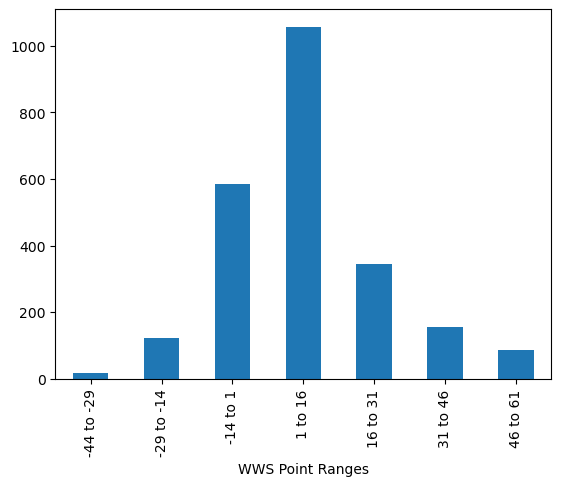

In [15]:
# Create bins
min_points = highest_rated['wws_points'].min()
max_points = highest_rated['wws_points'].max()
points_bins = np.arange(min_points, max_points, 15) # 5 was good with less granular cuisines
points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
bins_df = pd.cut(highest_rated['wws_points'], bins=points_bins, labels=points_labels)

# # Set the index and its name
points_df = highest_rated.set_index(bins_df)
points_df.index.name = "WWS Point Ranges"

# # Create grouped DataFrame by numeric means
binned_df = points_df.groupby(['WWS Point Ranges']).count()
binned_df['id'].plot(kind="bar")

In [16]:
bins = [1, 2, 3, 4, 5]
group_name = ['Poor', 'Fair', 'Good', 'Very Good']
clean_recipes['rating_scale'] = pd.cut(clean_recipes['rating'], bins, labels=group_name, include_lowest=True)
df = pd.DataFrame(clean_recipes.groupby('rating_scale')['wws_points'].mean()).reset_index()
df

,rating_scale,wws_points
0,Poor,9.883721
1,Fair,9.228571
2,Good,9.151786
3,Very Good,8.936504
